In [1]:
import pandas as pd
import numpy as np
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
from data_utils import load_dataset, encode_labels, split_dataset
from model_utils import build_model
from train_utils import train_model, plot_training_history
from eval_utils import evaluate_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

In [2]:
dataset_path = r"D:\Self_projects\Captcha solver\1\dataset\samples"

In [3]:
input_shape = (50, 200, 1)
num_chars = 5
num_classes = 19

In [ ]:
# Load

images, labels = load_dataset(dataset_path, target_size=(50, 200))

encoded_labels, char_list = encode_labels(labels, num_chars=num_chars)
num_classes = len(char_list)

# Split
data_splits = split_dataset(
    images, encoded_labels, test_size=0.1, val_size=0.1
)

# Build and train
X_train, y_train = data_splits["train"]
X_val, y_val = data_splits["val"]
X_test, y_test = data_splits["test"]

input_shape = (50, 200, 1)  
model = build_model(input_shape, num_chars=num_chars, num_classes=num_classes)

history = model.fit(
    x=X_train,
    y=y_train,  
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64,
)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - char_1_accuracy: 0.0667 - char_1_loss: 3.1492 - char_2_accuracy: 0.0444 - char_2_loss: 3.1325 - char_3_accuracy: 0.0526 - char_3_loss: 3.1965 - char_4_accuracy: 0.0480 - char_4_loss: 3.1779 - char_5_accuracy: 0.0632 - char_5_loss: 3.1201 - loss: 15.8246 - val_char_1_accuracy: 0.0463 - val_char_1_loss: 2.9438 - val_char_2_accuracy: 0.0556 - val_char_2_loss: 2.9451 - val_char_3_accuracy: 0.0833 - val_char_3_loss: 2.9421 - val_char_4_accuracy: 0.0370 - val_char_4_loss: 2.9448 - val_char_5_accuracy: 0.0463 - val_char_5_loss: 2.9455 - val_loss: 14.7215
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - char_1_accuracy: 0.0924 - char_1_loss: 2.9292 - char_2_accuracy: 0.0830 - char_2_loss: 2.9172 - char_3_accuracy: 0.0690 - char_3_loss: 2.9277 - char_4_accuracy: 0.1018 - char_4_loss: 2.9365 - char_5_accuracy: 0.1006 - char_5_loss: 2.9393 - loss: 14.6578 - val_char_1_accuracy: 0.0278 - val_char_1_loss: 2.9449 - val_char_2_accuracy: 0.0833 

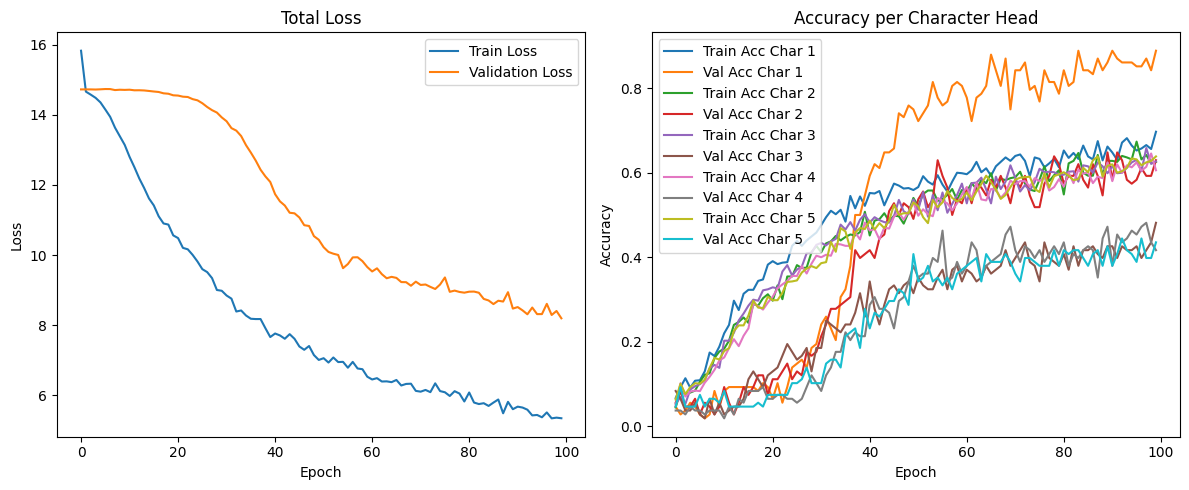

In [9]:
plot_training_history(history, num_chars=5)
plt.show()

In [ ]:
print(type(y_train))  # list?
print(len(y_train))  # 5?
for i, y in enumerate(y_train):
    print(f"y_train[{i}]: shape={y.shape}, dtype={y.dtype}")

<class 'list'>
5
y_train[0]: shape=(855, 19), dtype=float64
y_train[1]: shape=(855, 19), dtype=float64
y_train[2]: shape=(855, 19), dtype=float64
y_train[3]: shape=(855, 19), dtype=float64
y_train[4]: shape=(855, 19), dtype=float64


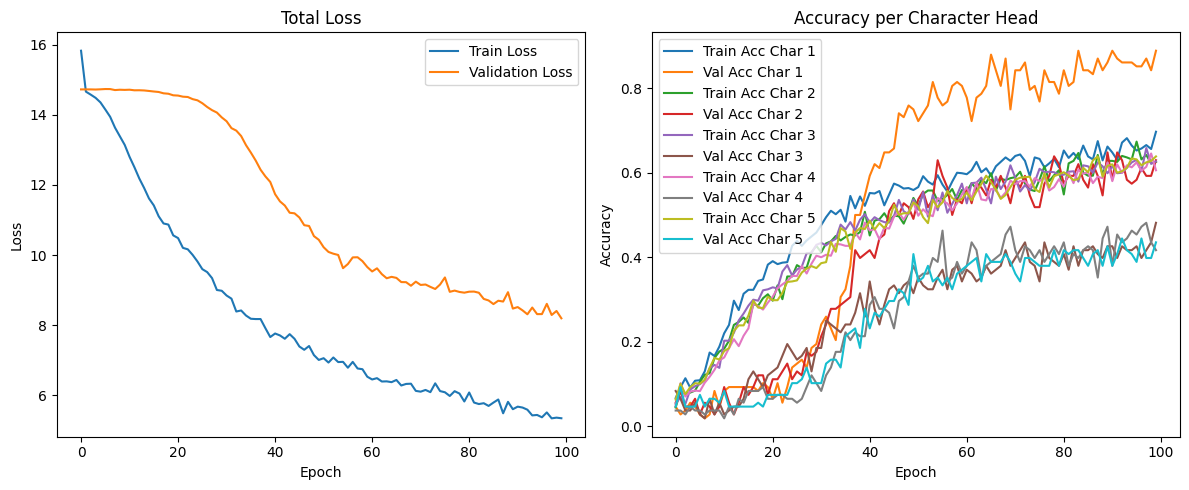

<Figure size 640x480 with 0 Axes>

In [11]:
plot_training_history(history, num_chars=5)
plt.savefig("training_history.png")
plt.show()